## ML Algorithms for Identifying DEGs

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# models tried
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
# Opening the dataset
df = pd.read_table("processed_alldata_98.txt", sep=" ")
y = df.label
X = df.drop('label', axis=1)
X = X.loc[:, (df != 0).any(axis=0)]

In [3]:
# Dataset shape
print(df.shape)
print(y.shape)
print(X.shape)
y.describe()

(98, 25555)
(98,)
(98, 24617)


count        98
unique        2
top       tumor
freq         49
Name: label, dtype: object

In [4]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

Accuracy = 1.0
Number of features used = 1
confusion matrix:
[[23  0]
 [ 0 17]]

classification_report
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        23
       tumor       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40




[Text(167.4, 163.07999999999998, 'X[15484] <= 1458.5\ngini = 0.495\nsamples = 58\nvalue = [26, 32]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]')]

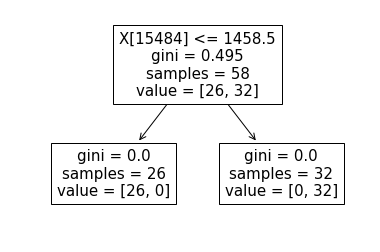

In [5]:
# Training and Testing
DTC = DecisionTreeClassifier()
dtc = DTC.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('Accuracy =', accuracy_score(y_test,y_pred))
print('Number of features used =', dtc.n_outputs_)

print('confusion matrix:', confusion_matrix(y_test,y_pred), sep='\n')
print()
print('classification_report', classification_report(y_test,y_pred), sep='\n')

print()
plot_tree(dtc)

### 1. Gini Index

In [6]:
# getting the DEGs
nn = np.array(dtc.feature_importances_, dtype=bool)
X.columns[nn]

Index(['NUSAP1'], dtype='object')

In [7]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [8]:
gs = []
for feature in X.columns:
    gs.append(gini(X[feature]))

# gini_df = pd.DataFrame(list(zip(X.columns, lst2)), columns =['Name', 'val']) 
gini_df = pd.DataFrame(gs, X.columns, columns =['Gini'])


In [20]:
gini_degs_100 = gini_df.sort_values('Gini').head(100).index.values

In [10]:
gini_df.loc['ADGRF5']

Gini    0.577712
Name: ADGRF5, dtype: float64

In [11]:
XX1 = X['TRMT11']
XX1_train, XX1_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

Accuracy = 1.0
Number of features used = 1
confusion matrix:
[[23  0]
 [ 0 17]]

classification_report
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        23
       tumor       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40




[Text(167.4, 163.07999999999998, 'X[21830] <= 228.5\ngini = 0.495\nsamples = 58\nvalue = [26, 32]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]')]

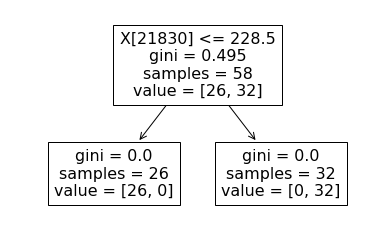

In [12]:
DTC = DecisionTreeClassifier()
dtc = DTC.fit(XX1_train, y_train)
y_pred = dtc.predict(XX1_test)

print('Accuracy =', accuracy_score(y_test,y_pred))
print('Number of features used =', dtc.n_outputs_)

print('confusion matrix:', confusion_matrix(y_test,y_pred), sep='\n')
print()
print('classification_report', classification_report(y_test,y_pred), sep='\n')

print()
plot_tree(dtc)

In [23]:
X2 = X[gini_degs_100]
X2.shape

(98, 100)

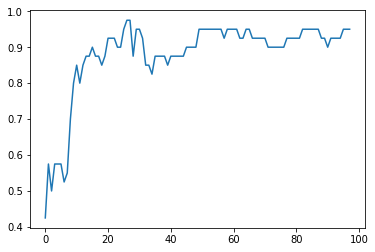

In [25]:
# No. of features vs. accuracy
from sklearn.svm import SVC
acc_list = []data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAD8CAYAAAB0IB+mAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3X1cjff/B/DXpU6dSjdUVKySEMU3d3OzqUQWa+jnJkay3H/dGzZr1g1hyBiN2dzkZnI/d8VCYRNj7kNNyrCV29yldOr9+6Od69tx6nTLOXXez8fjetDnfK7rvK/T57z7nM+5rs9HICIwxhir+WqpOwDGGGNvByd8xhjTEpzwGWNMS3DCZ4wxLcEJnzHGtAQnfMYY0xKc8BljTEtwwmeMMS3BCZ8xxrQEJ3zGGNMSnPAZY0xLcMJnjDEtwQmfMca0BCd8xhjTEpzwGWNMS3DCZ4wxLcEJnzHGtAQnfMYY0xKc8BljTEtwwmeMMS3BCZ8xxrQEJ3zGGNMSnPAZY0xLcMJnjDEtoavuAFjlGRgYZOTk5NRXdxyMlUQqlWa+fPnSSt1xaDuBiNQdA6skQRCIf49MkwmCACIS1B2HtuMhHcYY0xKc8BljTEtwwmeMMS3BCZ8xxrQEJ3zGGNMSnPC1QL9+/WBhYYH79+8rlOfm5qJ58+Z49913kZ+fDwDw8PCAIAgQBAFz584V6+7YsQP9+vWDnZ0dDA0N4eTkhKCgIDx//lzhmM+ePcP06dPRtWtXmJqaQhAEJCQkFBtXeno6hg4dioYNG8LQ0BDNmzfH119/DZlMJtZ58eIFBg4cCEdHRxgZGcHMzAwdOnTATz/9pHS8goICzJs3D/b29pBKpXB1dcXu3bsV6mRkZIjnpyo2TXDkyBEMHToUjRs3hoGBARo3bozx48cr/R7Pnj2L0aNHw8nJCYaGhrCzs4O/vz/S09OVjvngwQOMHz8e9vb2MDAwgKOjIz7//HOl32Nxhg8frvDaybcpU6ZU1SmzN42IeKvmW+GvsWR///03mZmZ0aBBgxTKZ82aRRKJhC5duiSWubu7U69evSgxMZHu3Lkjlnfo0IEGDBhAmzZtooSEBPrmm2/I1NSU3nvvPcrPzxfrpaWlkZmZGXl6elL//v0JAMXHxyvF9Pz5c2rcuDE5ODjQxo0b6ejRoxQcHEy1atWi6dOni/UeP35MgwYNoh9//JEOHz5MBw4coGHDhhEA+vbbbxWO+cUXX5C+vj5FRETQ0aNHafTo0VSrVi06ePCgWOfVq1eUmJhIkZGRJcamKfr370/e3t60du1aSkhIoB9++IFsbGzI0dGRnj9/Ltb79NNPqXPnzhQZGUkJCQm0efNmcnJyIgsLC4XfYUFBAXXq1IksLS1p1apVdPToUYqIiCBDQ0Pq379/qfEEBASQlZUVJSYmKmzp6eml7vtvG1X7e0XbN7UHwFsV/BJLSfhERD/++CMBoH379hER0fnz50lXV5dmz56tUM/d3Z0CAgKU9r93755SWVRUFAGgY8eOiWUFBQXi/+Pj40tMqocOHSIAdOTIEYXyoUOHkpWVVann07FjR3J1dRV/zszMJD09PQoLC1Oo5+npSa1bt1baX1Vs5ZWRkUFPnjyp9HFeV9xrfuzYMQJAUVFRKuulp6eTIAgUGhoqliUnJxMAWrNmjULdL7/8knR0dOjFixcq4wkICCA7O7tynkUhTviasfGQjpYYMWIEPD09MW7cODx69AgjRoxAkyZNEBQUVKb9LS0tlcratWsHALh7965YJghlu7fm1atXAAATExOFclNTU3F4SRVzc3Po6v7vRvFDhw7h1atXGDp0qEK9oUOH4vz587h9+3aZ4iqrly9fIjo6Gh9++CEaNmyImzdvVunxgbK/5sXVs7Ozg4WFhUI9Va95QUGBvPPAajBO+Fpk9erVePjwIdq1a4cLFy7gxx9/hL6+foWPFx8fDwBo3rx5ufft3r07mjRpghkzZiA5ORnPnj3D/v37sWHDhmLHhIkIMpkMDx8+xOrVq3Ho0CFMnDhRfDwpKQmGhoZo1KiRwn7Ozs4AgKtXr5Y7xuJiOH78OEaOHAkrKysMGzYMgiBg48aNaNGihVivoKAAMpms1K2goKDcMZT1NU9KSsL9+/cV6jk7O8PNzQ1hYWE4d+4cnj9/juPHj2Pp0qUYOXIkjIyMSn3+f/75R/xj27RpUyxevLhC58HURN0fMXir/IYyDOnITZkyhQDQiBEjin28pCGd1925c4csLCzI29u7xDqlDZtkZGRQx44dCYC4BQUFFVt3+fLlYh2JREKRkZEKj48aNYoaNGigtN+ff/5JAOinn34qV2xFpaSk0OzZs8ne3p4AUIcOHWj58uV0//79YusHBwcrnFNJW3BwcKnPXdTTp0+pSZMm5OLiQjKZrMR6eXl59P7771P9+vUpKytL4bFnz56Rj4+PQhzDhg1TeTy5b775hr799ls6cuQIHThwgEaOHEmCINCYMWNK3Rc8pKMRG0+epkUeP36MLVu2QBAE/Pbbb8jNza1QD//58+fo06cP9PX1sXbt2grFkpOTAz8/Pzx58gQ//fQTbGxscPz4cYSHh6N27dr4/PPPFer7+fmhY8eOePDgAfbu3YuJEydCX18fI0aMqNDzl1VgYCDWrVsHR0dHBAQEYOjQoXB0dFS5z+jRo+Hj41PqsW1sbMoch0wmw+DBg5GZmYnffvsNOjo6JdadMGECTp8+jdjYWJiamio8NmrUKPHTXZMmTXD+/HkEBwdj/PjxWLVqlcoYXv/k1atXL9SuXRvLli3DZ599pvTpimkgdf/F4a3yG8rYww8ICCBTU1Pat29fsV/YEpXew3/58iV5enpS3bp1KSkpSeXzqepFr1ixggRBULrCIyQkhCQSSYm956LnYmJiIvZMZ86cSYaGhkr1Tp8+TQAUrtQpLbaiJk6cSDo6OmRlZUVTpkyhs2fPqqxPRJSfn095eXmlbkWvblKloKCAhg4dSlKptNR4v/jiCxIEQekTDRHR/v37CQAdP35coXz9+vUEgC5cuFCmeIqSv77btm1TWQ/cw9eIjcfwtURcXByioqLw9ddfw8fHB9OmTcPXX3+NpKSkMh8jLy8PAwcOxO+//47Y2FiFcevyunz5MiwsLGBnZ6dQ3q5dO+Tl5eHGjRsq92/Xrh2ePn0qXpPu7OyM7OxspWvP5WP3FY3122+/xe3bt/Hpp5/i6NGjaNeuHVq0aIF58+bh1q1bxe4TFhYGiURS6hYWFlamGP773/8iOjoa27Ztg4eHR4n1FixYgHnz5iEyMhKDBw9Wevzy5csAgLZt2yqUy78IvnbtWpniKU5Zv6xnaqbuvzi8VX5DKT3858+fk729Pbm5uYmXTWZnZ1Pjxo2pU6dOCj3Nknr4+fn55OfnR1KplI4ePary+eRU9aKDg4OL7eHLx79v3bql8tj9+/cnU1NTysvLI6LCyzIlEgnNnTtXoV63bt0ULt8sS2yqXLhwgaZNm0ZWVlYkCAJ16dKFVq1aRdnZ2WKdu3fv0pkzZ0rd7t69W+rzzZgxg2rVqkWbNm1SWW/FihUEgObPn19inXXr1ildRquqvCwmTZpEgiBQWlqaynrgHr5GbGoPgLcq+CWWkvAnT55MUqmUkpOTFcoPHz5MAGjFihViWUkJf9y4ceKXqq/feHP79m2FujExMbR9+3YKCQkhABQSEkLbt2+nhIQEsc7Nmzepdu3a1Lx5c9q0aRMdOXKEQkJCSF9fn/r06SPWW7VqFQ0fPly84Wvnzp3k5+dHAGjx4sUKz/vZZ5+Rvr4+LVmyhOLj42ns2LEkCALFxMQonU9lr8OXyWQUExNDgwcPJgMDAzp//nyFjqPK119/TQAoMDBQ6TW/ceOGWG/Lli0kCAL17NlTqV7RYbesrCyytramhg0b0urVq8Ubr0xNTal169YKf/g9PT2pcePG4s/p6enUpUsXioyMpF9++YX27NlDAQEBJAgCTZgwodRz4YSvGZvaA+CtCn6JKhJ+YmIi1apVi8LDw4t9/JNPPiFjY2MxaZeU8O3s7Mp8tUlJdd3d3RXqXb58mXx9fcnGxoYMDAzIycmJQkJCFG4A+u2336hnz55kZWVFenp6ZGNjQ927dy82ictkMpozZw698847pKenRy1btqQdO3YUe95VeePV06dPFe58rSru7u4lvuZFf0cBAQEl1nv9NU9PT6eAgACytbUlqVRKjRs3psmTJ9PDhw+VnrvoTVYPHz6kPn36kK2tLenr65OBgQG1adOGvvvuO4Wb7UrCCV8zNl7xqgaoyhWvPDw8YGdnhzVr1kBHR6dGjs3KZDIcO3YM3bt3R3x8vMpxcVY1eMUrzcBf2jIlGzZsgEQiQXh4uLpDqXIZGRmQSCTo3r27ukNh7K3jHn4NUJU9fPldrwDQoEEDWFtbV8lxNYVMJsOFCxfEn5s1awZjY2M1RqQduIevGTjh1wC8iDnTdJzwNQMP6TDGmJbghM/Uav369RX+Ytje3h4hISFVG5AKOTk5mD59OqytrWFgYIBOnTrhxIkT5T5OdHQ0BEGAvb290mMPHjxAYGAgLC0tYWBggA4dOuDQoUNK9YouVFN0W7p0aUVOjWkJHtKpAarzkM79+/eRmpqKjh07lnvf8+fPw9LSEg0bNnwDkSkbMmQIYmJisGjRIjRq1AiRkZGIjY3F6dOn0apVqzIdIysrC05OThAEAfr6+gp3Bufm5qJ9+/Z4+PAhwsPDUb9+faxZswZ79uxBXFycwtVEHh4eePr0Kb777juF49vb28PKyqoqTrdK8ZCOZuCEXwNU54RfXVy8eBGurq7YsGED/P39ARR+Aezs7AxnZ2fs2rWrTMcZPXo0bt26BWtrayQkJCgk/E2bNsHf3x8nTpzA+++/D6DwPpn//Oc/kEql+P3338W68uSvyUs0FsUJXzPwkA57Y7Zs2QInJydIpVK0bNkSe/fuhYeHB4YPHy7WKW5IRxAEhISEICIiAra2tjAxMUHPnj3x119/KdR7m0M6e/fuhZ6eHgYMGCCW6erqYtCgQYiNjUVeXl6px/jtt9+wadMmREZGFvv4qVOnULt2bTHZA4WvRY8ePXDmzBmFxUwYqwhO+OyNiIuLw5AhQ9CiRQvs2rUL06dPx5QpU5CSklKm/devX4+4uDisWLECa9euxfXr1zFkyJByx0FEVbIYSVJSEhwdHSGVShXKnZ2dkZOTU+qKV3l5eRg9ejRmzJhR4vTKOjo60NPTUyqXT2F95coVhfKzZ8/CxMQEEokErVq1wrp161TGwBjPh8/eiODgYLRs2RI7d+4Ue/AuLi7izIylkUql2L9/v8IyhgMGDMDff/9drnnko6Ki8Mknn5RaLyAgAOvXry/x8UePHqFOnTpK5XXr1hUfV+Xrr79Gbm4uZs2aVWKdZs2a4dGjR0hJSUHTpk3F8sTERKXncHNzw5AhQ9C0aVNkZWVhw4YNCAwMRGZmptJaAozJccJnVS4/Px9nz57F7NmzFYZr2rZtW+ZFMnr06KGQ7Fu2bAkA+Ouvv8qV8D/66COcOXOm1HoWFhZlPmZ53bhxA+Hh4di9e7fSJ4SiPv74YwQHB2PYsGH48ccfYWVlhdWrV+P48eMAgFq1/veB/PWplfv06QNfX1/MmTMHkyZNgqGh4Zs5GVatccJnVe7BgwfIy8tDvXr1lB6rX79+mY4h7znLyYc1cnJyyhVL3bp1lVZ9Kk7RZFqcOnXqFDuGLu91vx5vUZMmTYKnpyc6duyIrKwsAIULihcUFCArKwtSqRRSqRRmZmbYtWsXAgICxD9wjRs3RkhICGbPnl3qXc+DBw/Gzz//jKSkJLRv315lXaadeAyfVTkLCwtIJBLcu3dP6bHMzMy3GktUVFSZFiMJDAxUeRxnZ2ekpqYiNzdXofzq1auQSqVwcHAocd+rV68iJiYGderUEbctW7bg9u3bqFOnjsIXz126dEFqaipSUlJw7do1pKSkQFdXFwYGBkoLl5SkJk54x6oG9/BZldPR0UG7du2wY8cOfPnll2IC+uOPP5CWlgY3N7e3FktVDel89NFHCA4Oxo4dO8Qvj2UyGbZu3Qpvb29IJJIS942Ojlb6ZLJgwQJcuHAB0dHRsLW1VXhMEAQ0adIEAPDs2TP88MMP8Pf3h5GRkcoYN2/eDCMjIzg7O6usx7QXJ3z2RoSGhqJHjx7o168fRo4ciQcPHiAkJARWVlalDp9UJXNzc5ibm1f6OK1bt4afnx8mTpyInJwc2NvbY+XKlUhLS8OWLVsU6urq6iIgIABr1qwBgGJvKlu/fj2kUqnS1MyzZs1C27ZtYWFhgT///BMLFy6Enp4e5s+fL9Y5ceIEFixYgP/7v/+Dvb09srKyEBUVhX379mHx4sUwMDCo9PmymokTPnsjvLy8sHnzZoSGhsLX1xeOjo6IiIhAWFhYmcbUNdG6desQFBSEoKAgZGVlwdXVFYcOHYKrq6tCvfz8fOTn51foOTIzMzF58mTcv38f9evXR9++fREaGqrwHYG1tTUKCgrw1Vdf4cGDB5BIJHB1dUV0dDT8/PwqdY6sZuM7bWuA6nKn7Z07d+Do6CgOUTDtwXfaagZO+DWAJib858+fY8aMGejevTssLCyQmpqKRYsW4eXLl0hKSip1PJrVLJzwNQMP6bA3QldXF//88w/Gjx+Phw8fwtTUFJ6enli4cCEne8bUhHv4NYAm9vAZK4p7+JqBr8NnjDEtwQmfMca0BCd8plWGDx+udO17dTB8+PBiV7iaMmWKUt21a9eidevWMDY2hpWVFT766COFhduZ9uIvbRmrJqysrLB7926Fstfn11m1ahXGjRuHCRMmYNGiRXjy5AnCw8Ph6emJixcv4p133nmbITMNwwmfsWpCX1+/1KUgN2zYgC5dumD58uVimaurKxwdHRETE4MxY8a86TCZBuMhHVYpKSkp8PX1Rb169SCVSmFra4sBAwZAJpMBAJ4+fYoJEyagefPmMDIygrW1NXr37o3r168rHEe+8tXp06fRv39/GBsbo379+liwYAEAIDY2Fq1bt4aRkRHeffddnD9/XmF/Dw8PeHh4YOfOnWjevDn09fXRqlUrxMXFlXoO9+/fx9ixY2FjYwM9PT00b95cnBZBLiMjAwEBAbCxsYG+vj6sra3h4+NT7ARx6vTq1SuYmJgolMnvbK7o3b+s5uAePquUDz/8EHXq1MHKlSthYWGBu3fvIiYmRlxB6tmzZ5DJZAgNDUX9+vXx8OFDfPfdd+jUqROuXbumtOC2v78/AgICMHbsWGzbtg2zZs3C48ePERsbi6CgIBgaGmLmzJnw9fXFjRs3FObMT05OxowZMxAaGgpTU1NERETAx8cHFy5cQPPmzYuN/+nTp3j//feRm5uLsLAw2NvbIyYmBqNGjcKrV68wbtw4Ma5bt25h0aJFeOedd5CZmYnDhw8jOztb5esj/8NXmqLnUZJ//vkH5ubmePLkCRwcHDB69GhMmzZNYW6icePGYezYsYiKikLfvn2RlZWFmTNnwsbGBgMHDixTLKwGIyLeqvlW+Gt8++7fv08AaM+ePWXeRyaT0YsXL8jIyIiWLFkilq9bt44AUHh4uFiWl5dHlpaWpKenR7du3RLL9+zZQwDo119/Fcvc3d0JAP3xxx9i2YsXL8jS0pI+/vhjsSwgIIDc3d3Fn8PCwkgqldKNGzcU4gwMDKR69eqRTCYjIiIjIyNatmxZmc9TDkCZttJ888039O2339KRI0fowIEDNHLkSBIEgcaMGaNUd/Xq1aSnpyce28HBgZKTk8sde1X69xzV/l7R9o17+KzCzM3N4eDggM8//xz37t2Dh4dHseu1btu2DREREUhOTsaTJ0/E8uTkZKW6PXv2FP+vq6sLR0dHvHjxQmEKYScnJwDA7du3FfZ1cHBAmzZtxJ8NDQ3h4+ODY8eOlXgOBw8eROfOnWFnZ6fQG/f29sbatWuRnJyMFi1aoH379li0aBEAwNPTE87OzmWad74sUzOXxetX4/Tq1Qu1a9fGsmXL8Nlnn4krif3888+YPHkyJk2ahF69eiErKwsLFy6Et7c3fv3113KtFsZqIHX/xeGt8hvU1MMnIkpNTSV/f38yNzcXe5Pff/+9+PjevXsJAE2aNIliY2Pp9OnTdObMGbK0tKSAgACxnryHn5aWpnB8d3d3hR45EVFaWhoBoHXr1inU69ixo1J8n3/+OUmlUvHn13v4jo6OKnvex48fJyKizMxM+u9//0s2NjYEgGxsbGjOnDmUn5+v8vXJy8sr01YRp0+fJgC0bds2IiIqKCigevXqUWBgoEK9rKwsMjU1pSlTplToeaoCuIevERv38FmlODg4YMOGDSAiXLx4EStWrMCYMWPQqFEjeHl5ITo6Gp6enli2bJm4z6tXr0pd9LsiSlphS1Wv1tzcHNbW1liyZEmxjzdr1gwAUK9ePURGRiIyMhLJycmIiorC7NmzUb9+fYwaNarE46taGKWowpxYMfJPGpmZmbh3757SylimpqZo0qQJrl27VuHnYDUDJ3xWJQRBgKurK5YsWYI1a9bgypUr8PLyQnZ2tlLSi4qKeiNXjNy8eRPnzp0Th3Wys7Oxf/9+9OjRo8R9vL29ERkZCXt7+zIvZN6sWTPMmzcPq1atwpUrV1TWraohneJs3rwZgiCgXbt2AArX3dXX18fZs2cV6j158gR//vmnuE4u016c8FmFXbp0CZMnT4afnx8cHR2Rn5+P9evXQyKRoGvXrgAKE+q4ceMwZ84cdO7cGadOnUJkZCTMzMyqPB4rKysMGDBAvEpn8eLFyMrKQlBQUIn7TJ06FVu3bkWXLl0wdepUNG3aFM+ePcP169dx8uRJ7N69G0+ePEH37t0xZMgQODk5QSKR4Oeff8bjx49V/jEBICbjyrh16xb8/f0xaNAgNGnSBC9fvsSuXbuwYcMGjB8/Hvb29gAKr9MfMWIEVq5ciTp16sDb2xtPnjzB4sWLkZ2djbFjx1Y6Fla9ccJnFWZlZQVbW1ssWbIEd+7cgVQqRcuWLXHgwAFxFahRo0bh9u3bWLlyJebPn4/27dvjwIED8PX1rfJ4mjVrhkmTJiEoKAg3b95E06ZNsX///hIvyQQKhztOnjyJsLAwzJ8/H3fv3oWZmRmcnJwwYMAAAIBUKkWbNm3www8/4NatW9DR0UGzZs2wZcsWfPjhh1V+Hq8zNjZG3bp18fXXXyMzMxO1atVC8+bNERkZqZTEly5dCkdHR6xbtw7ff/89jIyM0Lp1axw/fhzvvvvuG4+VaTaeHrkG4OmRIc6Pk5CQoNY4WPF4emTNwHfaMsaYluCEzxhjWoKHdGoAHtJhmo6HdDQD9/AZY0xLcMJnb1xCQgIEQUB6erq6Q6kQDw8PccGRuXPniuU7duxAv379YGdnB0NDQzg5OSEoKAjPnz8v9jinTp2Ct7c3zMzMYGRkhFatWmH79u3ljuf27dvo27cv7OzsYGBgAAsLC3h4eODgwYMK9c6ePYvRo0fDyckJhoaGsLOzg7+/v9LvISMjQ2FRFf7iu+bihM9YGfTq1QuJiYn45JNPxLLFixdDR0cH8+bNQ2xsLMaOHYvIyEh4e3uLs4XKHThwAG5ubrC2tsaWLVuwZ88ejBgxAjk5OeWO5cWLF6hbty7mzp2LmJgYrFmzBrVr10avXr2wd+9esV50dDSSkpIwadIkxMbGYv78+Th79izat2+Pu3fvivXMzc2RmJiIyMjICrwyrFpR99wOvFV+gxrn0imL+Pj4YufJqS7c3d0V5v2Ru3fvnlJZVFQUAaBjx46JZU+fPiVLS0uaPHnyG4sxLy+PGjZsSH379lUZX3p6OgmCQKGhoUqPyX9P8fHxVR4feC4djdi4h8+U/PTTTxAEodi5Vzp37oxu3boBKOwszJw5E66urjAxMYGlpSW6deuGU6dOlfocgiBg/fr1CmXp6enFDins2rULHTt2hKGhIczMzDBw4EDcuXOnwudXVSwtLZXK5HfWFu1Bb9++Hffv38enn376xmLR1dWFqampwrz6xcVnZ2cnrlvAtA8nfKakb9++qF27NjZu3KhQfvPmTSQmJmLo0KEAgIKCAmRkZGDGjBnYu3cv1q1bB3Nzc7i5ueHy5ctVEsuqVavQv39/uLi4YOfOnVi1ahUuXrwIDw+PEsfK5fLz8yGTyUrdCjugVSM+Ph4AFO7u/fXXX1G3bl1cvnwZLi4u0NXVxTvvvIPQ0NBKzSlUUFAAmUyGjIwMhIWFISUlRVywpSRJSUm4f/++yruPWQ2m7o8YvFV+wxsY0gkICCA7OzsqKCgQy0JDQ8nAwICePHlS7D4ymYzy8vKoSZMmNGnSJLG8uCEdvDa9MdH/pj2WDyk8e/aMTExMaNSoUQr1UlNTSSKR0PLly1Weg3xRlNK20oYwShrSed2dO3fIwsKCvL29Fco/+OADkkqlZGpqShEREXT06FH64osvSEdHh7766qtSj1uSTz/9VDyH2rVr065du1TWz8vLo/fff5/q169PWVlZSo/zkE7N33guHVYsf39/REVF4cSJE3BzcwNQODtj7969FdZMPXz4MMLDw3Hp0iWFKY8dHBwqHUNiYiKePn2KIUOGKCxOYmtri2bNmuH48eOYMGFCift///33ePbsWanPI58CuTKeP3+OPn36QF9fH2vXrlV4rKCgADk5OQgPD8e0adMAAF27dsWjR4+wcOFCzJo1C1KptNzPOWXKFAwaNAgZGRnYsGEDBg8ejN27dyssIlPUhAkTcPr0acTGxorr3DLtwgmfFatr165o0KABNm3aBDc3N5w5cwYpKSkK88afO3cOvXr1woABAzBt2jTUq1cPOjo6GDlyZIWuPnmdfH57+Tw5r6tXr57K/R0dHeWfgFTS0dEpd2xF5eTkoE+fPkhLS8OJEydgbW2t8Li5uTkAwMvLS6G8R48eWLVqFW7cuAEXF5dyP2/Dhg3RsGFDAICPjw88PDwwY8aMYhN+UFAQVq9ejc2bN4vfwTDtwwmfFatWrVoYMmQIVq9ejeXLl2PTpk2wtLTEBx98INbZuXMnbG1tsXnzZoV9Hz58WOr0x/r6+sjNzVUWV9JVAAAgAElEQVTaryh5oty4caO4rGFRxsbGKp+jW7duKpc3lIuPjy/xj0pp8vLyMHDgQPz+++84cuQIWrRooVTH2dlZ5TGq4o8jUPiF8YoVK5TKFyxYgHnz5uG7777D4MGDq+S5WPXECZ+VyN/fHwsXLsSePXuwdetWDBo0SOEqkOzsbIWfASAuLg537txB48aNVR7bzs5O6Yvdffv2KfzcuXNnGBsbIzU1VfyiuDze9JBOQUEB/P39ERcXh5iYmBKnH+7bty9mz56NQ4cOKSxCcvDgQRgaGhb7R6Iisfz6669Kr3tkZCRmzZqF+fPnl/qFLqv5OOGzErm4uMDV1RXTpk1DZmamUtL19vbG0qVLMWnSJPTp0wdXr15FeHg4GjRoUOqxBw0ahEWLFqFJkyZwdnZGQkICtm3bplDHxMQEixYtwoQJE5CRkYGePXvCxMQEd+/eRXx8PLy8vODn51fic1TF2LwqEyZMwNatWxEUFAQDAwOFy1GLDre4uLhg+PDh+Oqrr1BQUIA2bdrg8OHD+PHHHxEaGgpDQ0NxP3t7e9jb26u82zUkJASPHj3Ce++9BysrK2RkZGDNmjX4/fffsXXrVrFedHQ0Jk6ciJ49e8LDw0MhPhMTkyr5Q8OqGXV/a8xb5Te8wRuvIiIiCAA1bdq02Me//fZbsre3J6lUSu3ataO4uDilhceLu0rn5cuXNGnSJLKysqLatWvTwIEDxUW5X79K5MCBA+Th4UHGxsZkYGBAjo6OFBgYSNeuXXsDZ6yspKt07OzsSrzyJzg4WKFubm4uBQUFUcOGDUkikVDTpk2LvcrIwsKC/Pz8VMazZ88e6tq1K1laWpKenh7Z2tpS79696eTJkwr1AgICSozv9YXhifgqHW3YeLbMGoBny3yzPDw8YGdnhzVr1kBHR0dcNLyqpaSkoFmzZjh9+vRbX51KJpPh2LFj6N69e6W+0ygJz5apGfjGK8bKYMOGDZBIJAgPD39jz3Hs2DF4eXm99WSfkZEBiUSC7t27v9XnZW8f9/BrAO7hv1nJycnil78NGjRQuuyyupPJZLhw4YL4c7NmzUq9Aqq8uIevGTjh1wCc8Jmm44SvGXhIhzHGtAQnfMYY0xKc8BljTEtwwmeMMS3BCZ8xxrQET61QA0il0kxBEOqrOw7GSiKVSjPVHQPjyzKZhhEEoT+ARQDaEtGj0urXNIIgWAH4A8AIIjqo7nhYzcIJn2kMQRCaAfgVQE8iOqvueNRFEAQ3ANsAdCCiW+qOh9UcPIbPNIIgCEYAdgL4UpuTPQAQ0XEAEQC2C4Kgr+54WM3BPXymdkLhbGQbUDiTYwDfNiy+JrsA/E1E49UdD6sZuIfPNMEYAK4AxnKyL/Tv6/AJgA8EQfhY3fGwmoF7+EytBEFoByAWwHtElKLueDSNIAj/AXAYgAcRJak7Hla9cQ+fqY0gCOYAdgAYx8m+eER0EcBMADsFQajaKSyZ1uEePlMLQRBqAdgP4BoRfarueDSdIAg/ADABMIiHvVhFcQ+fqcsXAIwBfK7uQKqJiQCa/PsvYxXCPXz21gmC0B2FV+W0I6K/1R1PdSEIggOAUwD6EFGiuuNh1Q/38NlbJQhCQwAbAQzhZF8+RHQTwAgAWwVBsFR3PKz64R4+e2sEQdADkABgHxHNV3M41ZYgCPMBtAPgTUT56o6HVR+c8NlbIwjCMgAOKBySKFB3PNWVIAi6AH4B8BsRzVZ3PKz64Nky2VshCIIfgI9QOCkaJ/tKICKZIAiDAfwhCEIiEcWoOyZWPXAPn71xgiA4ATgB4AMiOqfueGoKQRC6oPA+hg5ElK7mcFg1wF/asjdKEITaKJwU7QtO9lWLiE4AWAieZI2VEffw2Rvz7wRgmwC8AhDINwxVvX9f4x0A7hHROHXHwzQb9/DZmzQOgAuA8Zzs34wik6x1EwRhqLrjYZqNe/jsjRAE4V0UTp3QmYhuqDuemk4QhJYAjgLoSkRX1B0P00zcw2dV7t9J0bYBGMPJ/u0gossAPkXhJGsm6o6HaSbu4bMq9e+kaAcAXCGiGeqOR9sIgvA9gLoABvIwGnsd9/BZVfsSgBGAWeoOREtNRuHNbZPVHQjTPNzDZ1VGEIQPAKxD4c1V/6g7Hm0lCEIjFE6y9n9E9Ju642Gag3v4rEoIgmALIArAx5zs1YuI0gAEAogWBKGeuuNhmoN7+KzS/p0U7TiAXUS0UN3xsEKCIMwF0AlAD55kjQHcw2cVUEyvMQJABoBFagiHlSwYAAEIK1rIUytrL074rFwEQbACcKbIz4MA9AQwnK8K0Sz/9uo/BjBMEASfIg9d5fVxtRMnfFZebQCkAIAgCC0ALAfQn4iy1BoVKxYR3QPgB2DNv1/mAsBNAP9RX1RMXTjhs/JqA+Dcv5Oi7QDwGRFdUHNMTAUiOglgPoAdgiBIAZxD4e+RaRlO+Ky82qAwYfwAIJGI1gqCYCAIQkc1x8WKIQhC53+/VF8GIPXffznhaylO+Ky8WgNoAcAJwGeCIHyKwkQyQa1RMSX/zqQ5A8ANAONR+DvyAGCNwt8j0zJ8WSYrM0EQ6gL4C8BLABsA+AOIBzCPiC6qMzZWMkEQ2gMIAtABwGYAw1F4N3QdIspRY2jsLeMePisPdwCGAPQBWAJwIyI/TvaajYjOEFFfAB8AaAhAgsLfIQ/DaRle05aVhyGAXwF8QkSp6g6GlQ8RXQIwSBCEZii8K7q2mkNibxkP6TDGmJbgIR3GGNMS1X5Ix8DAICMnJ6e+uuNgmkEqlWa+fPnSSt1xANw2mSJNaJvVfkhHEAS+o5+JBEEAEQnqjgPgtskUaULb5CEdxhjTEpzwGWNMS3DCZ4wxLcEJnzHGtAQnfMYY0xKc8N+Q9evXo3DuqvKzt7dHSEhI1QakQk5ODqZPnw5ra2sYGBigU6dOOHHiRJn2LSgowLx582Bvbw+pVApXV1fs3r37DUfMKoPbphYjomq9FZ6C5rl37x4lJiZWaN9z587R7du3qziikn388cdkZmZGP/zwAx0+fJh8fX1JKpXSxYsXS933iy++IH19fYqIiKCjR4/S6NGjqVatWnTw4MG3ELmyf9uD2tslcdusEtw2q7hNqjuASp+Ahr6pqosLFy4QANqwYYNYlpeXR02bNiVfX1+V+2ZmZpKenh6FhYUplHt6elLr1q3fSLyl0YQ3lXzjtlk53DarfuMhnQrYsmULnJycIJVK0bJlS+zduxceHh4YPny4WKe4j82CICAkJAQRERGwtbWFiYkJevbsib/++kuh3tv82Lx3717o6elhwIABYpmuri4GDRqE2NhY5OXllbjvoUOH8OrVKwwdOlShfOjQoTh//jxu3779xuJmxeO2WYjbZvE44ZdTXFwchgwZghYtWmDXrl2YPn06pkyZgpSUlDLtv379esTFxWHFihVYu3Ytrl+/jiFDhpQ7DiKCTCYrdSsoKFB5nKSkJDg6OkIqlSqUOzs7IycnBzdv3lS5r6GhIRo1aqRQ7uzsDAC4evVquc+LVRy3TcV9uW0qq/Zz6bxtwcHBaNmyJXbu3Cn2klxcXNCuXbsy7S+VSrF//37o6v7vpR8wYAD+/vtv2NjYlDmOqKgofPLJJ6XWCwgIwPr160t8/NGjR6hTp45Sed26dcXH38S+rOpx26yafWsyTvjlkJ+fj7Nnz2L27NkKH4nbtm2r1JMoSY8ePRTeUC1btgQA/PXXX+V6U3300Uc4c+ZMqfUsLCzKfExWfXHbZGXBCb8cHjx4gLy8PNSrV0/psfr1yzYporyHIaevrw+g8PKz8qhbty5MTU1LrVerlupRuzp16uDu3btK5fIe0Ovxvr7v48ePK7Qvq1rcNpX35bapjMfwy8HCwgISiQT37t1TeiwzM/OtxhIVFQWJRFLqFhgYqPI4zs7OSE1NRW5urkL51atXIZVK4eDgoHLf7OxspKenK+0LAC1atKjYybFy47apvC+3TWXcwy8HHR0dtGvXDjt27MCXX34pfnT+448/kJaWBjc3t7cWS1V9bP7oo48QHByMHTt2iF/QyWQybN26Fd7e3pBIJCXuK3988+bNCAoKEss3bdoEV1dXvPPOO2U8G1ZZ3DYVcdssHif8cgoNDUWPHj3Qr18/jBw5Eg8ePEBISAisrKxK/YhalczNzWFubl7p47Ru3Rp+fn6YOHEicnJyYG9vj5UrVyItLQ1btmxRqKurq4uAgACsWbMGAFCvXj1MmzYNc+bMgaGhIVq3bo2tW7fi6NGjOHDgQKVjY+XDbZPbZmk44ZeTl5cXNm/ejNDQUPj6+sLR0REREREICwsr07ilJlq3bh2CgoIQFBSErKwsuLq64tChQ3B1dVWol5+fj/z8fIWy8PBw1K5dG9988w0yMzPRrFkzbN++HT179nybp8DAbZPbZul4xasqcOfOHTg6OuKHH36Av7+/WmPRdpqwqpAct01WlCa0TU745fT8+XPMmDED3bt3h4WFBVJTU7Fo0SK8fPkSSUlJMDIyemuxMGWa8KaS47bJitKEtslDOuWkq6uLf/75B+PHj8fDhw9hamoKT09PLFy4kN9QTK24bbLScA+f1Sia0IuS47bJitKEtsnX4TPGmJbghM8YY1qCE76GGz58ODw8PNQdRrk8ffoUYWFh6Ny5M8zNzVGnTh2899572Lt3b7H18/PzsXTpUri4uEAqlcLCwgJeXl5v/Q5RVj7VsW0CwBdffIFWrVrBzMwMhoaGaN68OebOnYuXL1+KdcrbhqsLTvisyv3111/47rvv4O7ujk2bNiE6OhpNmjRBnz59sHr1aqX6/v7+mDt3LgIDA3Ho0CGsXbsWrVq1UrqlnrGq8OzZM3zyySf46aefsG/fPnz88ceYO3euwtz55W3D1QV/aavhhg8fjvT0dCQkJKg7lDJ78eIFBEGAoaGhQnm3bt2QlpamMI95dHQ0hg4ditOnT6Nt27aVfm5N+GJMjttm9TFr1ix8/fXXePToEczMzMrVhstKE9qm1vXwU1JS4Ovri3r16kEqlcLW1hYDBgyATCYDUPhRbsKECWjevDmMjIxgbW2N3r174/r16wrHka8adPr0afTv3x/GxsaoX78+FixYAACIjY1F69atYWRkhHfffRfnz59X2N/DwwMeHh7YuXMnmjdvDn19fbRq1QpxcXGlnsP9+/cxduxY2NjYQE9PD82bNxdvKZfLyMhAQEAAbGxsoK+vD2tra/j4+BQ7uVZVMzIyUnqjAIVT9b4++6G8F1UVyb6647b55ttmSeRTQejo6AAoXxuuTrTuOvwPP/wQderUwcqVK2FhYYG7d+8iJiZGXH3n2bNnkMlkCA0NRf369fHw4UN899136NSpE65duwYrKyuF4/n7+yMgIABjx47Ftm3bMGvWLDx+/BixsbEICgqCoaEhZs6cCV9fX9y4cUNhvvHk5GTMmDEDoaGhMDU1RUREBHx8fHDhwgU0b9682PifPn2K999/H7m5uQgLC4O9vT1iYmIwatQovHr1CuPGjRPjunXrFhYtWoR33nkHmZmZOHz4MLKzs1W+PvLkUpqi51FWCQkJCueVl5eH06dPY8yYMZg5cybWrl2Lp0+fok2bNpg/fz66du1a7ueozrhtvt22KZPJkJOTg1OnTmHJkiUIDAyEsbGxyn1eb8PVjroX1a3shnIsFH3//n0CQHv27CnzPjKZjF68eEFGRka0ZMkSsXzdunUEgMLDw8WyvLw8srS0JD09Pbp165ZYvmfPHgJAv/76q1jm7u5OAOiPP/4Qy168eEGWlpb08ccfi2UBAQHk7u4u/hwWFkZSqZRu3LihEGdgYCDVq1ePZDIZEREZGRnRsmXLynyecgDKtJXXqlWrCABFR0eLZf/88w8BIGNjY/rPf/5Du3fvpgMHDpC7uzvp6enR9evXKxQ/aUC7JG6bIk1sm5cvX1bYZ9iwYWJ8JSmuDZc3flJzm9SqHr65uTkcHBzw+eef4969e/Dw8ICjo6NSvW3btiEiIgLJycl48uSJWJ6cnKxUt+hETLq6unB0dMSLFy9ga2srljs5OQGA0sLJDg4OaNOmjfizoaEhfHx8cOzYsRLP4eDBg+jcuTPs7OwUejze3t5Yu3YtkpOT0aJFC7Rv3x6LFi0CAHh6esLZ2Vlp4erilGVa2/I6duwYJk+ejMDAQPj5+Ynl8p5rXl4eYmJixFWV3Nzc4ODggAULFmDdunVVHo8m4rb5dtumo6Mjzpw5gxcvXuDkyZOYP38+gMK5/ItTUhuudtT9F6eyG8rZ20xNTSV/f38yNzcnAOTg4EDff/+9+PjevXsJAE2aNIliY2Pp9OnTdObMGbK0tKSAgACxnrwXlZaWpnB8d3d3hV4PEVFaWhoBoHXr1inU69ixo1J8n3/+OUmlUvHn13tRjo6OKns3x48fJyKizMxM+u9//0s2NjYEgGxsbGjOnDmUn5+v8vXJy8sr01ZWZ8+eJRMTE/Lx8VHaLzs7mwRBoDZt2ijt17t3b2rbtm2Zn0cOGtCLkm/cNjW7bRYlf83OnDmj9JiqNlwemtA2taqHDxT2XDZs2AAiwsWLF7FixQqMGTMGjRo1gpeXF6Kjo+Hp6Ylly5aJ+7x69eqNLHpc0upEqtYPNTc3h7W1NZYsWVLs482aNQNQOB94ZGQkIiMjkZycjKioKMyePRv169fHqFGjSjy+qkUliipsv6olJSXhgw8+QOvWrbF9+3alsVUDAwOVqxaVd2m96o7b5ttrm6+TL/R+48YNhUXfS2vD1U31jr4SBEGAq6srlixZgjVr1uDKlSvw8vJCdna2UsOKiopSmmu7Kty8eRPnzp0TPzpnZ2dj//796NGjR4n7eHt7IzIyEvb29mVeBLpZs2aYN28eVq1ahStXrqisW1Ufm1NTU+Hl5YVGjRph3759kEqlxdbz9fXF8uXLcffuXTRo0ABA4ZeTJ0+ehI+PT5XEUt1w2yzemxhulJMPVTVu3FgsK2sbrk60KuFfunQJkydPhp+fHxwdHZGfn4/169dDIpGIV4R4e3tj3LhxmDNnDjp37oxTp04hMjISZmZmVR6PlZUVBgwYIF4JsXjxYmRlZSksyfa6qVOnYuvWrejSpQumTp2Kpk2b4tmzZ7h+/TpOnjyJ3bt348mTJ+jevTuGDBkCJycnSCQS/Pzzz3j8+LHKNywAhd5NRd27dw/dunVDTk4OQkJCkJSUpPB469atxQWyp0+fjo0bN6Jnz5746quvoKenJ07p+9lnn1U6luqC2+bbaZuXLl3C9OnTMWDAADg4OCA3NxfHjx/HsmXL4OPjg/bt2wMoXxuuVtQ9plTZDeUYJ83MzKRhw4ZRkyZNyMDAgOrUqUNubm70yy+/iHXy8/MpKCiIrK2tycDAgNzc3OjcuXNkZ2dX5eOk7u7utHPnTnJyciI9PT1ycXGhQ4cOKez7+jgpEdGjR49oypQpZG9vTxKJhCwtLalLly707bffEhFRTk4OjR49mlq0aEFGRkZkYmJC7du3py1btpT5taqM+Ph4lWO5r79mycnJ5OPjQ7Vr1yZDQ0Pq3r27whUi5QENGCeVb9w2Na9tZmRk0ODBg8ne3p6kUinVrVuX2rVrR5GRkZSbmyvWK28bLgtNaJt8p62ayOcgqQl3KWoSTbibUY7bJitKE9qm1t1pyxhj2ooTPmOMaQke0mE1iiZ8bJbjtsmK0oS2yT18xhjTEpzwyyghIQGCICA9PV3doVSIh4cHBEGAIAiYO3euWL5jxw7069cPdnZ2MDQ0hJOTE4KCgvD8+fNij3Pq1Cl4e3vDzMwMRkZGaNWqFbZv316hmHJycjB9+nRYW1vDwMAAnTp1wokTJ5SeTx53dX7936Sa2jaBwikf+vfvDxMTE5iYmKBfv35K00CU1eHDh+Hp6QkrKyvo6+ujYcOG8PPzw7Vr1xTqlfU9ER0drdA2qwNO+FqkV69eSExMxCeffCKWLV68GDo6Opg3bx5iY2MxduxYREZGwtvbW5zrRu7AgQNwc3ODtbU1tmzZgj179mDEiBEVviN2xIgRWLNmDebMmYP9+/fD2toaPXr0wKVLl8Q6Li4uSExMxJdfflmxk2bVQnFtMzs7G56enkhOTsbGjRuxceNGpKSkwNPTs9SZNYvz8OFDtGnTBitWrMAvv/yC+fPn48qVK+jUqRPu3Lkj1ivre8LLywuJiYkYMWJE5U7+bVL3daGV3VCBmRsrQn5dbkWuv9UE7u7uCtdqy927d0+pLCoqigDQsWPHxLKnT5+SpaUlTZ48uUriuXDhAgGgDRs2iGV5eXnUtGlT8vX1Vapf0rXlr4MGXOss37htlk1JbXPp0qWko6NDN2/eFMtu3rxJOjo6FZptszjXr18nALR06VKxrKzvCbng4OAyzdKpCW2zxvbwf/rpJwiCoPRxDQA6d+6Mbt26ASj8gzdz5ky4urrCxMQElpaW6NatG06dOlXqcwiCgPXr1yuUpaenQxAEpWuYd+3ahY4dO8LQ0BBmZmYYOHCgQq9CXSwtLZXK5Hc0Fl3oYfv27bh//z4+/fTTKnnevXv3Qk9PDwMGDBDLdHV1MWjQIMTGxiIvL69KnkcTcdssm7179+K9995Do0aNxLJGjRrhvffew549e6rkOeQLnxSdI6es74nqqMYm/L59+6J27drYuHGjQvnNmzeRmJgorl9ZUFCAjIwMzJgxA3v37sW6detgbm4ONzc3XL58uUpiWbVqFfr37w8XFxfs3LkTq1atwsWLF+Hh4VHiWLlcfn4+ZDJZqRtV4dUg8fHxAKCw0MOvv/6KunXr4vLly3BxcYGuri7eeecdhIaGVmgul6SkJDg6OirNT+Ls7IycnJwKLSFXXXDbLJukpCS4uLgolTs7O+Pq1asVOqY87levXuHPP//EmDFjYGVlhYEDB6rcp7j3RLWk7o8Yld2g4qNUQEAA2dnZUUFBgVgWGhpKBgYG9OTJk2L3kclklJeXR02aNKFJkyaJ5cV9bMZrt6QT/e9W9fj4eCIievbsGZmYmNCoUaMU6qWmppJEIqHly5eXGD/R/xajKG2TP5+q4xT3sfl1d+7cIQsLC/L29lYo/+CDD0gqlZKpqSlFRETQ0aNH6YsvviAdHR366quvSj3u67y8vOi9995TKo+LiyMAdPLkSYXymjakw21T8TjFtU2JREJBQUFK5UFBQaSnp6fymKq0bdtWjM3R0ZGuXr2qsn5J7wm56jSkU6MnT/P390dUVBROnDgBNzc3AMDmzZvRu3dvmJiYiPUOHz6M8PBwXLp0SWGqWVVT95ZVYmIinj59iiFDhigsCmFra4tmzZrh+PHjmDBhQon7f//993j27FmpzyOferYynj9/jj59+kBfXx9r165VeKygoAA5OTkIDw/HtGnTAABdu3bFo0ePsHDhQsyaNatGzCb4tnDbVJ+NGzfi6dOnuHnzJhYvXowePXrgt99+U1gYRk7Ve6I6qtEJv2vXrmjQoAE2bdoENzc3nDlzBikpKQrzdZ87dw69evXCgAEDMG3aNNSrVw86OjoYOXJklczHLp9XXD4/yevq1auncn9HR8cyfSSWL75cUTk5OejTpw/S0tJw4sQJWFtbKzwuH+v08vJSKO/RowdWrVqFGzduFPvxuyR16tQpdjxUntTq1q1b3lOoVrhtlq5OnTp4/PixUvmjR48q1T7kwzIdOnRAz549YW9vj4ULF2LFihUK9Up7T1RHNTrh16pVC0OGDMHq1auxfPlybNq0CZaWlvjggw/EOjt37oStrS02b96ssO/Dhw9LnXZWX18fubm5SvsVJU+UGzduFJeTK6q0RZO7deumclk5ufj4+BLfuKXJy8vDwIED8fvvv+PIkSNo0aKFUh1nZ2eVxyhvAnJ2dsaePXuQm5urMM3s1atXIZVKq6QHq8m4bZbO2dlZaVpioLCNFNdGK8LMzAyOjo64ceOGQnlZ3hPVUY1O+EDhR+eFCxdiz5492Lp1KwYNGqTwjXx2drbSKjZxcXG4c+eOwmIIxbGzs1P68mzfvn0KP3fu3BnGxsZITU0Vv4wrjzf9sbmgoAD+/v6Ii4tDTEwM3n333WLr9e3bF7Nnz8ahQ4fQsmVLsfzgwYMwNDQs9xvio48+QnBwMHbs2IEhQ4YAAGQyGbZu3Qpvb+8yr25UnXHbVK13796YMWMG0tPTYW9vD6DwSqPffvsNixcvrtAxX5eZmYnr168jICBALCvre6I6qvEJ38XFBa6urpg2bRoyMzOVGra3tzeWLl2KSZMmoU+fPrh69SrCw8PF1ZdUGTRoEBYtWoQmTZrA2dkZCQkJ2LZtm0IdExMTLFq0CBMmTEBGRgZ69uwJExMT3L17F/Hx8fDy8lK5KPKbHv+cMGECtm7diqCgIBgYGChc8tewYUM0bNgQQOHrOHz4cHz11VcoKChAmzZtcPjwYfz4448IDQ2FoaGhuJ+9vT3s7e1VTq/bunVr+Pn5YeLEicjJyYG9vT1WrlyJtLQ0bNmy5Y2drybhtqnaqFGjsGLFCvTp0wdz5swBAMyePRt2dnYYOXKkWC89PR2NGjVCcHAwQkJCSjyer68v2rRpg1atWsHExAQpKSn45ptvIJFIMHXqVLFeWd8T1ZK6vzWu7IYyfDseERFBAKhp06bFPv7tt9+KCyK0a9eO4uLilBaLKO5KiJcvX9KkSZPIysqKateuTQMHDqTTp08Xe2XCgQMHyMPDg4yNjcnAwIAcHR0pMDCQrl27Vmr8VaGkKyHs7OxKvLoiODhYoW5ubi4FBQVRw4YNSSKRUNOmTYu9ksPCwoL8/PxKjSk7O5umTp1K9evXJ319ferQoQMlJCQUW7emXaUjx21T9RVkt27dIl9fXzI2NiZjY2Pq27cvpaenK9S5cuUKAaCVK1eqfJ4FCxZQmzZtyNTUlAwMDKhp06Y0ZswYpeOV5z1BVL2u0lH7m6LSJ/CW7mas7gxf6/cAAAI7SURBVNzd3WnYsGGUl5encClgVUtOTiYAdPr06So7Zl5eHq1Zs6ZGJnxW+bb5/fffk4WFBb148eINRFeygoICysvLo9mzZ1ebhF9jb7xiyjZs2ACJRILw8PA39hzHjh2Dl5dXlY17njp1ChKJpHrNV8LKrTJt89ixY5g6darCsOLbsHXrVkgkEnG4qTrg+fC1RHJysvgFW4MGDarNJWYvXrxQmIKgVatW0NPTK7G+Jsw5Lsdts2yqa9t8/PgxUlNTxZ9LW2RdE9omJ3xWo2jCm0qO2yYrShPaJg/pMMaYluCEzxhjWoITPmOMaQlO+IwxpiU44TPGmJao9lMrSKXSTEEQ6qs7DqYZpFJpprpjkOO2yYrShLZZ7S/LZIwxVjY8pMMYY1qCEz5jjGkJTviMMaYlOOEzxpiW4ITPGGNaghM+Y4xpCU74jDGmJTjhM8aYluCEzxhjWoITPmOMaQlO+IwxpiU44TPGmJbghM8YY1qCEz5jjGkJTviMMaYlOOEzxpiW4ITPGGNaghM+Y4xpCU74jDGmJTjhM8aYluCEzxhjWoITPmOMaQlO+IwxpiU44TPGmJbghM8YY1qCEz5jjGkJTviMMaYlOOEzxpiW4ITPGGNaghM+Y4xpCU74jDGmJTjhM8aYluCEzxhjWoITPmOMaQlO+IwxpiU44TPGmJbghM8YY1qCEz5jjGkJTviMMaYlOOEzxpiW4ITPGGNaghM+Y4xpCU74jDGmJTjhM8aYluCEzxhjWuL/AVQZePmhvPfDAAAAAElFTkSuQmCC
X2 = X[gini_degs_100]
for i in range(1, X2.shape[1]-1):
    xx = X2.iloc[:,list(range(i))]
    X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.40, random_state=42)
    svc = SVC(kernel='linear')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))
    
plt.plot(acc_list)
plt.show()